#              PG AIML - AI and Machine Learning Capstone Project

# CYBER SECURITY

## Description



### Problem Statement:



### Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

# Dataset Details: 

### The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 1: Phishing

 0: Suspicious

 1: Legitimate

The sample could be either legitimate or phishing.

### Project Task: Week 1

Exploratory Data Analysis:

1. Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

2. Determine the number of samples present in the data, unique elements in all the features. 

3. Check if there is any null value in any features. 

### Correlation of features and feature selection:

4. Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

## Project Task: Week 2

## Building Classification Model

1. Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.



     * Build classification models using a binary classifier to detect malicious or phishing URLs.

     * Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

     * Validate the accuracy of data by the K-Fold cross-validation technique.

     * The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [3]:
# Load the dataset
dataset = pd.read_csv("dataset-cyber.csv")

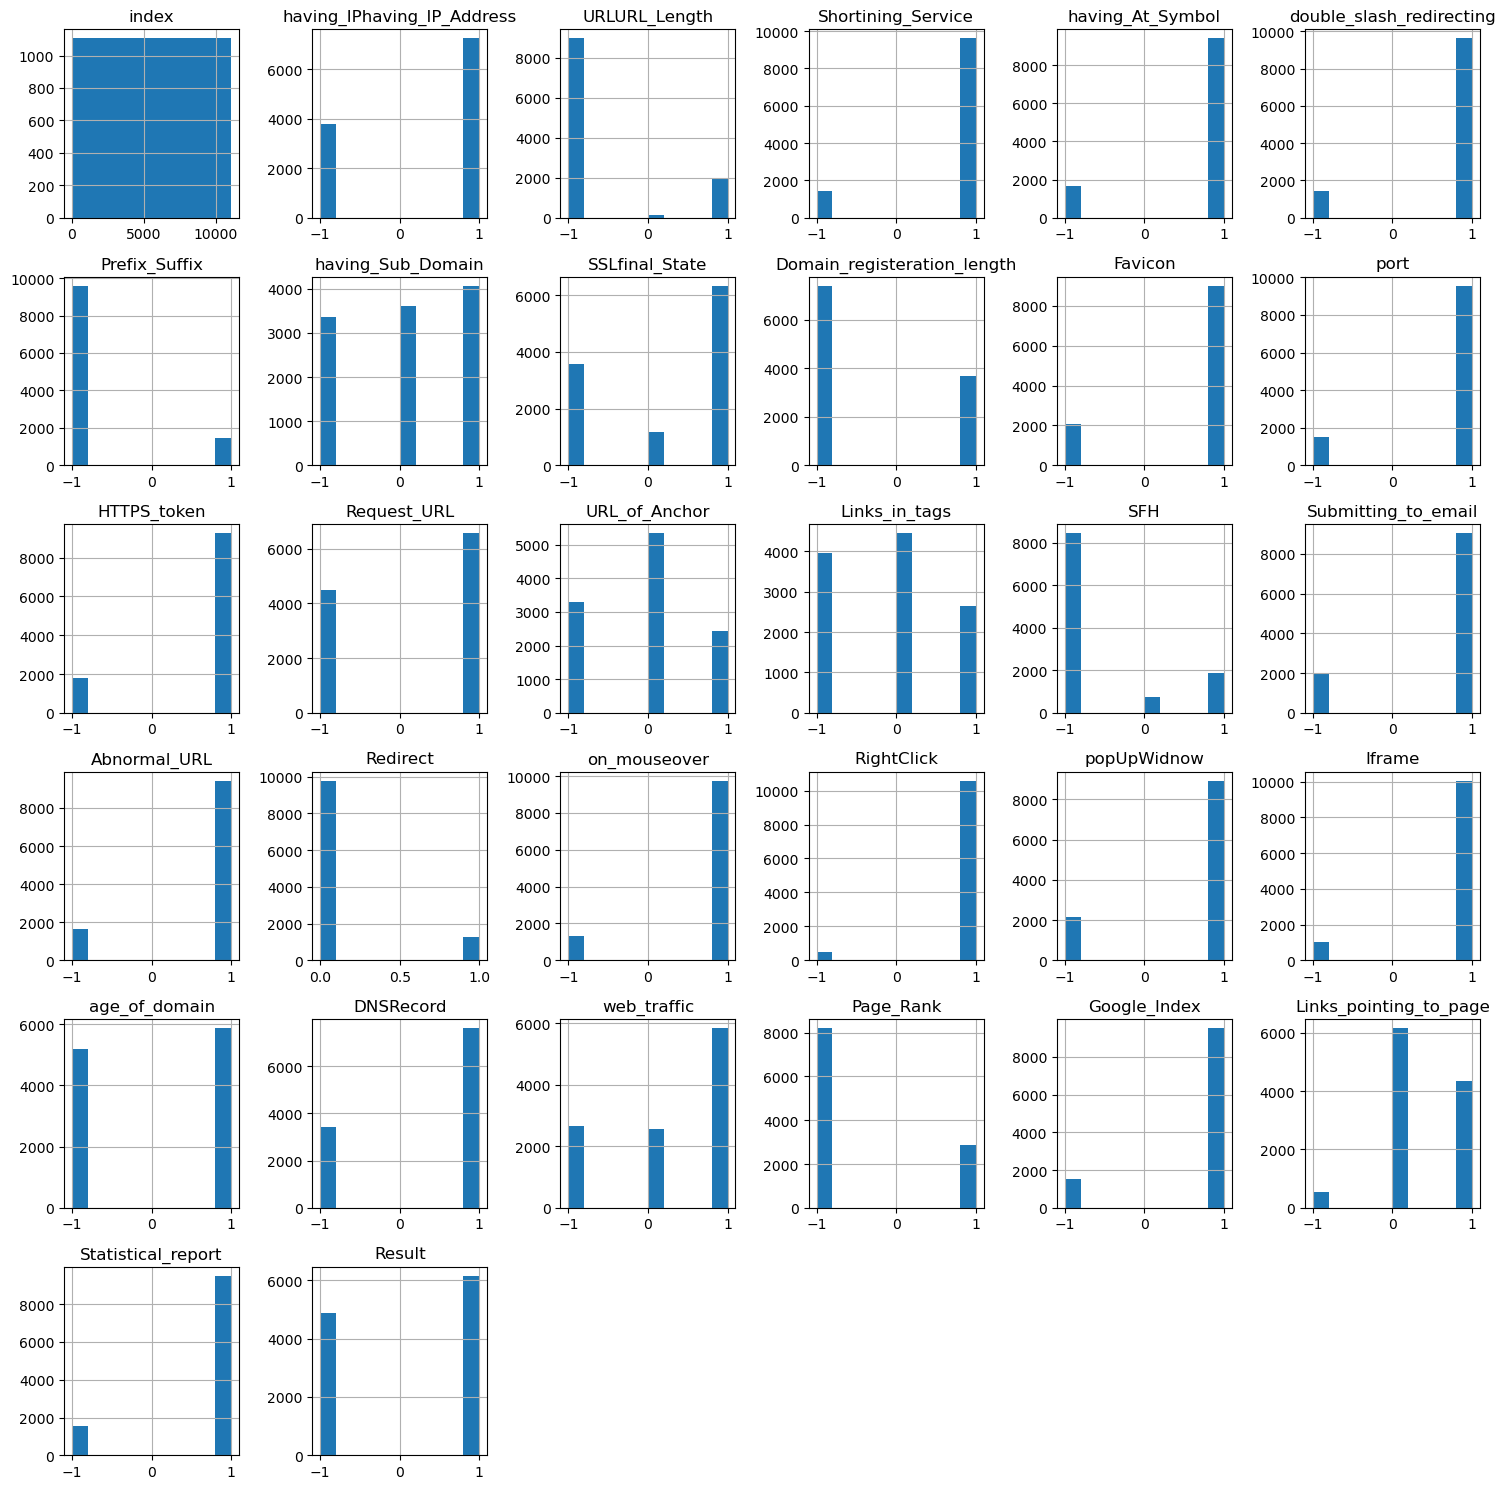

In [4]:
# Week 1: Exploratory Data Analysis (EDA)
# Histogram and Heatmap Visualization
dataset.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

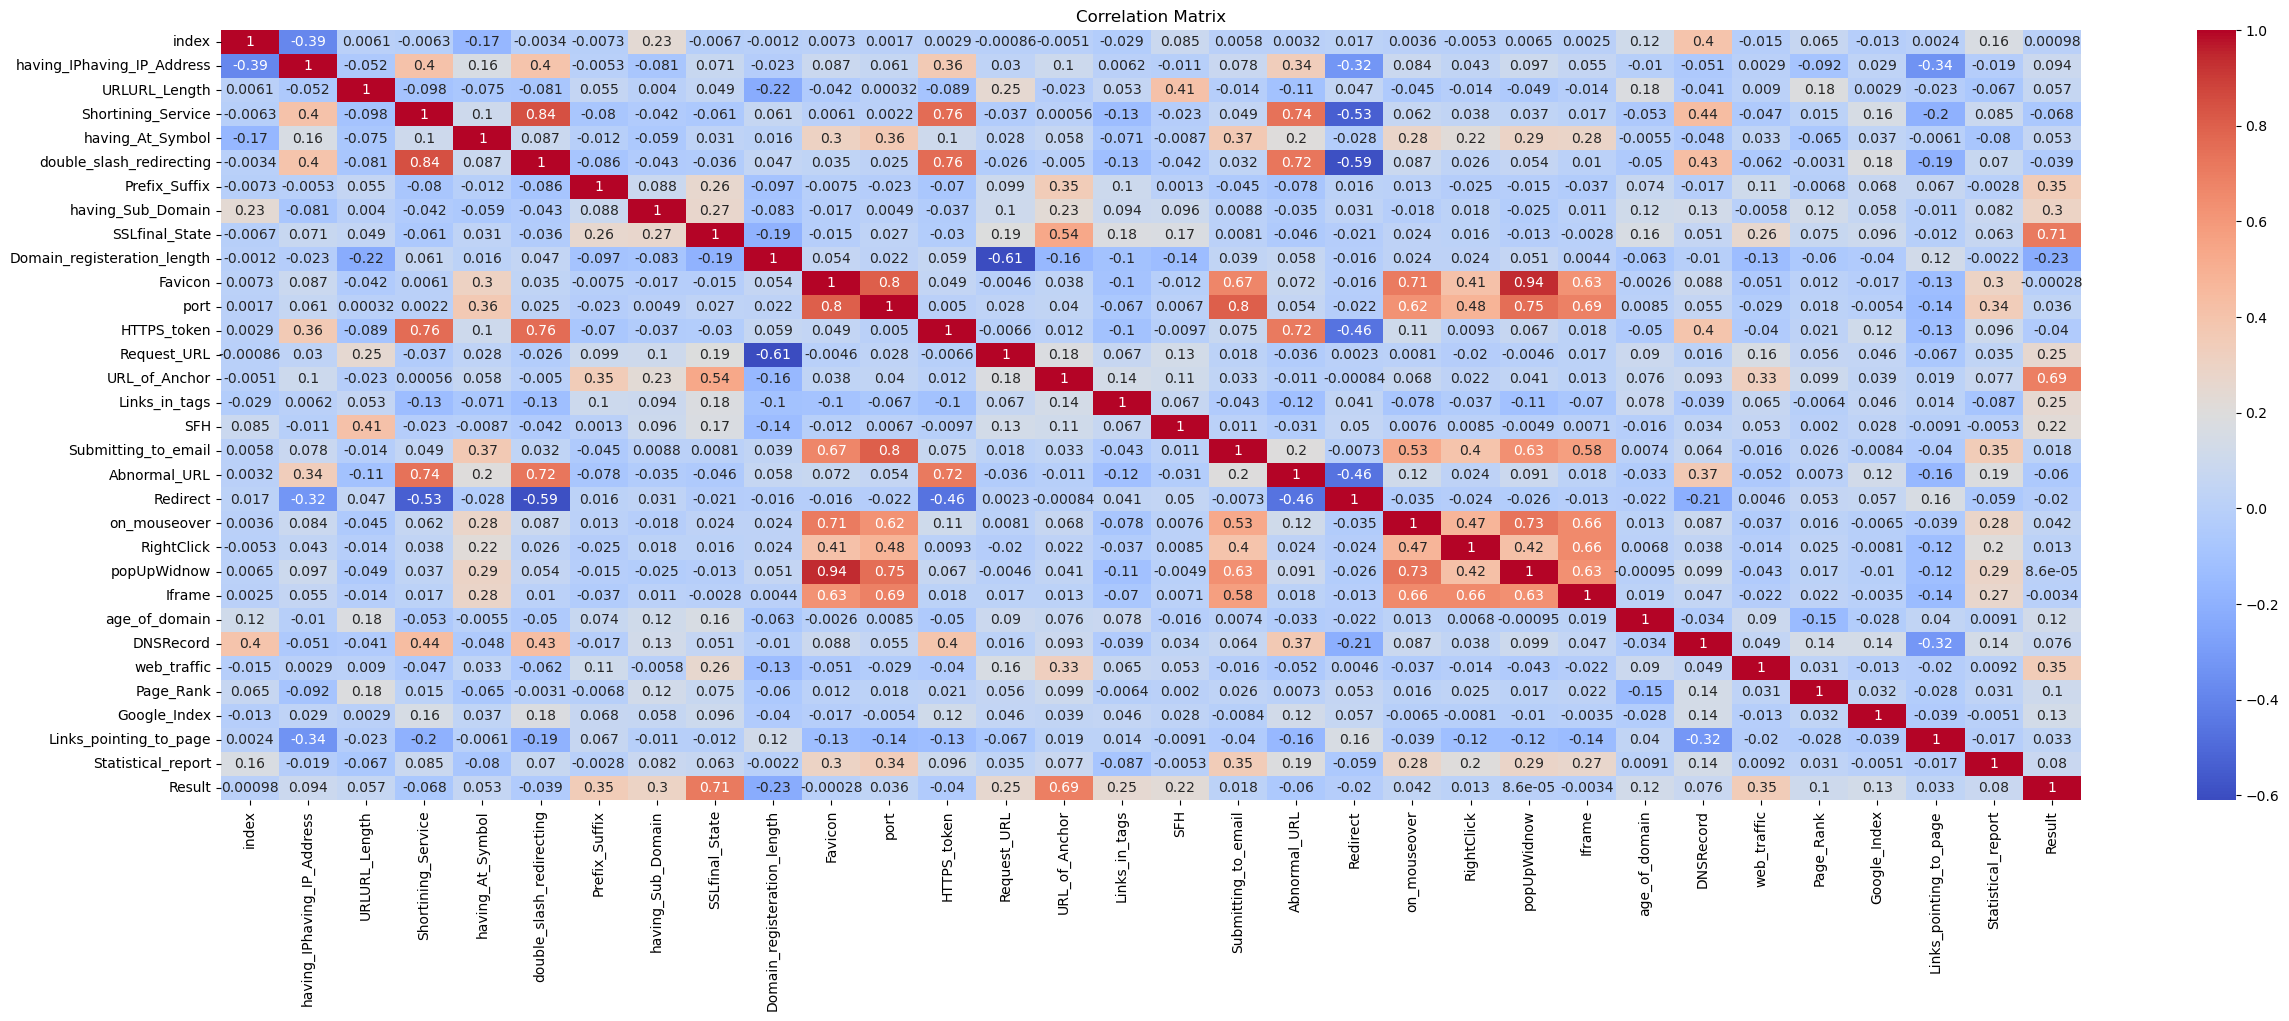

In [5]:
plt.figure(figsize=(30, 10))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
# Data Inspection
num_samples = len(dataset)
print("Number of samples:", num_samples)


Number of samples: 11055


In [7]:
unique_elements = dataset.nunique()
print("Unique elements in each feature:")
print(unique_elements)

Unique elements in each feature:
index                          11055
having_IPhaving_IP_Address         2
URLURL_Length                      3
Shortining_Service                 2
having_At_Symbol                   2
double_slash_redirecting           2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
port                               2
HTTPS_token                        2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Submitting_to_email                2
Abnormal_URL                       2
Redirect                           2
on_mouseover                       2
RightClick                         2
popUpWidnow                        2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_t

In [8]:
null_values = dataset.isnull().sum()
print("Null values in each feature:")
print(null_values)

Null values in each feature:
index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing

# Correlation Analysis and Feature Selection

In [9]:

corr_matrix = dataset.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]  # Define your threshold here
dataset_filtered = dataset.drop(to_drop, axis=1)
print("Correlated features dropped:", to_drop)

Correlated features dropped: ['double_slash_redirecting', 'port', 'popUpWidnow']


In [10]:
# Week 2: Building Classification Model
# Split data into features (X) and target variable (y)
X = dataset_filtered.drop('Result', axis=1)
y = dataset_filtered['Result']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Build RandomForestClassifier (you can use any other classifier)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Model Evaluation
# Accuracy on test set
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.9651741293532339


In [15]:
# K-Fold Cross-Validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.98055179 0.97693351 0.97421981 0.95929444 0.95703302]
Mean CV accuracy: 0.9696065128900949


In [16]:
# ROC Curve
y_scores = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

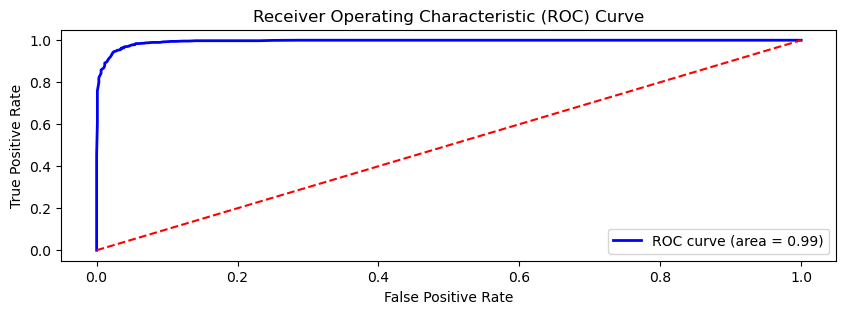

In [29]:
plt.figure(figsize=(10, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
# K-Fold Cross Validation with new attribute
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_classifier, X, y, cv=kfold)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.9660787  0.96834012 0.96653098 0.96924469 0.97150611]
Mean Cross-Validation Score: 0.9683401175938489


### Here we have used the RandomForestClassifier model  and tried to validate using K-Fold validation technique

### The best accuracy for  this problem which we were able to achieve is  0.9651741293532339

### Submitted by -
 Divyansh Shivhare